In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from dateutil.parser import parse

In [20]:
f = "../data/001_raw/003.xls"
esolmet = pd.read_excel(f,skiprows=[0,1,3,4],
                        index_col=0,
                       parse_dates=True)
esolmet = esolmet.loc["2018-03"].resample("10Min").mean()
nombres = {'Directa':"Ib",
           'Global':"Ig",
           "Difusa":'Id',
           'Temperatura':"To",
           'Humedad':"HR",
           'Viento Vel.':"WS", 
           'Presiòn Bar.':"P"}
esolmet.rename(columns=nombres,inplace=True)
del esolmet["UV"]
# esolmet.index = esolmet.index.to_series().apply(hora_solar)
esolmet.columns

Index(['Ib', 'Ig', 'Id', 'To', 'HR', 'WS', 'P'], dtype='object')

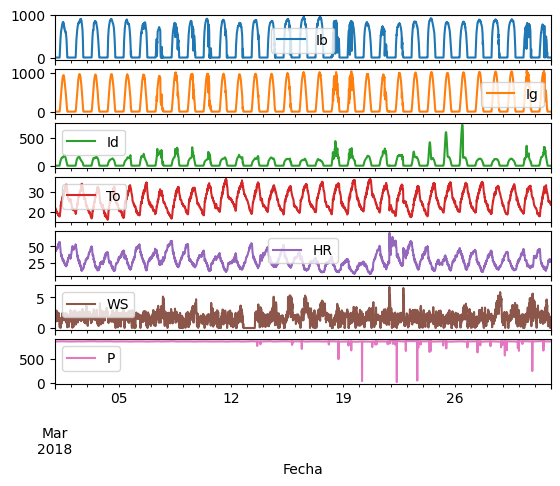

In [21]:
esolmet.plot(subplots=True);

In [22]:
f = "../data/001_raw/2018-2019-VIENTO-TMIX-RUOA.txt"
ruoa = pd.read_csv(f,
                   skiprows=4,
                   delimiter="\t",
                   encoding="ANSI",
                   usecols=[0,5],
                   names=["time","WD"]
                  )
ruoa.time = pd.to_datetime(ruoa.time,
                           format="%d/%m/%Y %H:%M")
ruoa.set_index("time",inplace=True)
ruoa = ruoa.loc["2018-03"]
ruoa = ruoa.resample("10Min").mean()
# ruoa.index = ruoa.index.to_series().apply(hora_solar)
ruoa.columns

Index(['WD'], dtype='object')

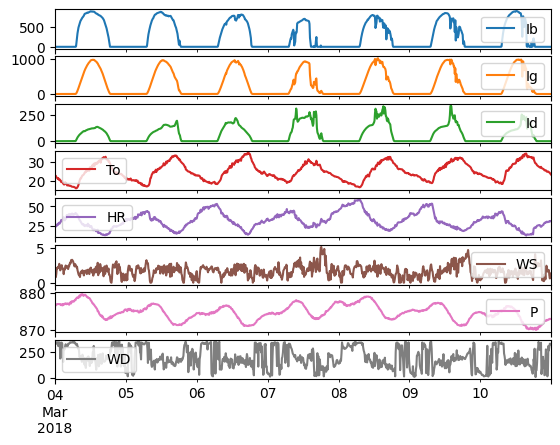

In [23]:
marzo = pd.concat([esolmet,ruoa],axis=1)
marzo = marzo.loc["2018-03-04":"2018-03-10"]
marzo.plot(subplots=True);

In [24]:
marzo.to_csv("../data/002_processed/3marzo2018.csv")

In [25]:
# f = "../data/002_processed/3marzo2018.csv"
# prueba = pd.read_csv(f,index_col=0,parse_dates=True)
# prueba.plot(subplots=True);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


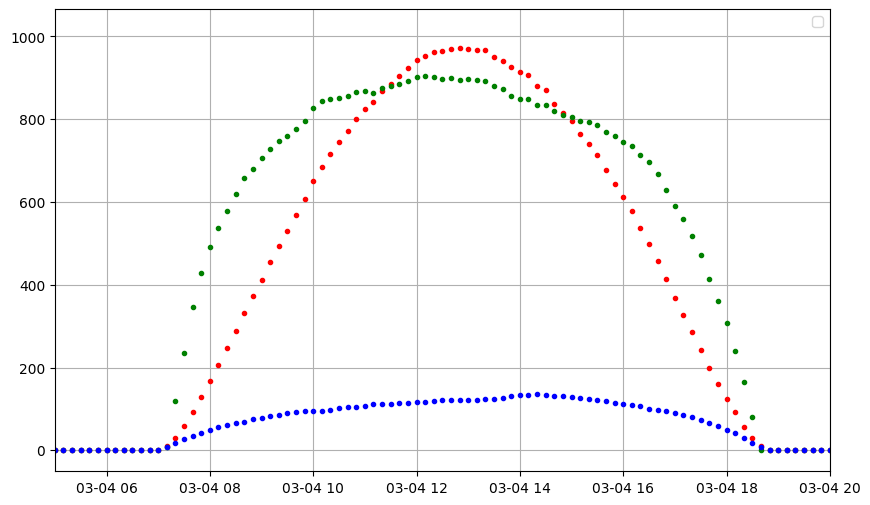

In [27]:
fig, ax  = plt.subplots(figsize=(10,6))
f1 = parse("2018-03-4 05:00")
f2 = f1 + pd.Timedelta("15H")

ax.plot(marzo.Ig,"r.")
ax.plot(marzo.Ib,   "g.")
ax.plot(marzo.Id,   "b.")



ax.set_xlim(f1,f2)
ax.legend()
ax.grid()
